In [45]:
#@author: Niraj Kumar

In [46]:
#necessary imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio

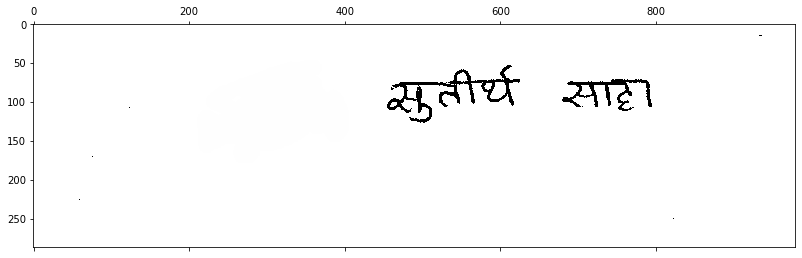

In [47]:
#loading the Signature dataset
path = "./Hindi/"
dir_list = next(os.walk(path))[1]
dir_list.sort()

#segregating genuine and forged signatures
original, forged = [], []
for directory in dir_list:
    images = os.listdir(path+directory)
    images.sort()
    images = [path+directory+'/'+x for x in images]
    forged.append(images[:30])
    original.append(images[30:])

im = imageio.imread(original[159][23])
plt.matshow(im, cmap = 'gray')

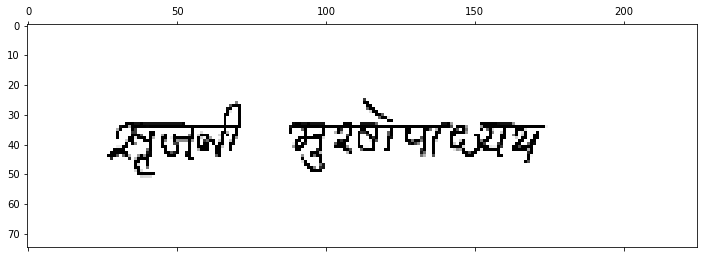

In [48]:
import cv2

new_original= []
new_forged = []

for person in original:
    for sign in person:
        im = cv2.imread(sign)
        res = cv2.resize(im, dsize=(225, 75), interpolation=cv2.INTER_CUBIC)
        new_original.append(res)


for person in forged:
    for sign in person:
        im = cv2.imread(sign)
        res = cv2.resize(im, dsize=(225, 75), interpolation=cv2.INTER_CUBIC)
        new_forged.append(res)
        
np.random.shuffle(new_forged)
np.random.shuffle(new_original)

forged_train = np.array(new_forged[:(70  * len(new_forged)) // 100])
forged_test = np.array(new_forged[(70 * len(new_forged)) // 100:])

forged_train = forged_train / 255.0
forged_test = forged_test / 255.0

original_train = np.array(new_original[:(70  * len(new_original)) // 100])
original_test = np.array(new_original[(70 * len(new_original)) // 100:])

plt.matshow(original_test[0])

In [49]:

original_train = original_train / 255
original_test = original_test / 255

print(len(original_train))
print(len(original_test))

print(len(forged_train))
print(len(forged_test))

forged_train_labels = np.zeros(len(forged_train), dtype = float)
forged_test_labels = np.zeros(len(forged_test), dtype = float)
original_train_labels = np.ones(len(original_train), dtype = float)
original_test_labels = np.ones(len(original_test), dtype = float)

2688
1152
3360
1440


In [50]:
#defining a model
def get_model():
    sgd = keras.optimizers.SGD(learning_rate=0.001, momentum = 0.1)
    model = keras.Sequential([
                            keras.layers.Flatten(), 
                            keras.layers.Dense(256, activation='relu'),
                            keras.layers.Dense(256, activation = 'relu'),
                            keras.layers.Dense(2, input_shape = ( 11250 , ), activation = 'sigmoid')
      ])
    
    model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [51]:
    model = get_model()
    
    #training the model on original dataset
    model.fit(forged_train, forged_train_labels, epochs=10)
    model.fit(original_train, original_train_labels, epochs=10)
   
    
   

Epoch 1/10
105/105 [==============================] - 6s 25ms/step - loss: 0.0132 - accuracy: 0.9905
Epoch 2/10
105/105 [==============================] - 2s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
105/105 [==============================] - 2s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
105/105 [==============================] - 2s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
105/105 [==============================] - 2s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
105/105 [==============================] - 2s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
105/105 [==============================] - 2s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
105/105 [==============================] - 2s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
105/105 [==============================] - 2s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
105/105 [==============================] - 2s 2

In [52]:
#evaluation
print("Evaluation on forged!")
model.evaluate(forged_test, forged_test_labels)

print("evaluation on original!")
model.evaluate(original_test, original_test_labels)


Evaluation on forged!
45/45 [==============================] - 19s 12ms/step - loss: 358.0467 - accuracy: 0.0000e+00
evaluation on original!
36/36 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]